Sampling frequency: 47998.18181684818 Hz


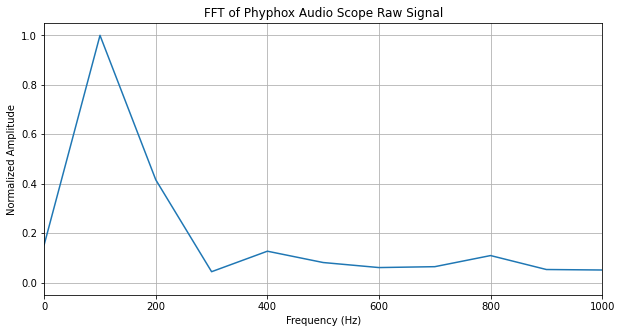

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
#Load the Phyphox CSV file (time, amplitude)
# -----------------------------------------------------------
data = np.loadtxt("Audio data.csv",
                  delimiter=",",
                  skiprows=1)  # <-- Skip header

t = data[:,0] / 1000.0   # convert ms → seconds
x = data[:,1]


# -----------------------------------------------------------
# Pre-process the signal
# -----------------------------------------------------------
# Remove DC offset (important for FFT)
x = x - np.mean(x)

# Sampling frequency (fs)
dt = np.mean(np.diff(t))
fs = 1.0 / dt
print("Sampling frequency:", fs, "Hz")

# -----------------------------------------------------------
# Apply a window to reduce spectral leakage
# -----------------------------------------------------------
window = np.hanning(len(x))
xw = x * window

# -----------------------------------------------------------
# Compute the FFT
# -----------------------------------------------------------
N = len(xw)
X = np.fft.rfft(xw)               # real FFT
freqs = np.fft.rfftfreq(N, dt)    # frequency axis
magnitude = np.abs(X)             # amplitude spectrum

# Normalize (optional, but gives nicer plots)
magnitude = magnitude / np.max(magnitude)

# -----------------------------------------------------------
# Plot the results
# -----------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(freqs, magnitude)
plt.xlim(0, 5000)     # or adjust depending on your tube
plt.title("FFT of Phyphox Audio Scope Raw Signal")
plt.xlabel("Frequency (Hz)")
plt.xlim(0, 1000)
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.show()

100.00 Hz, amplitude: 1.000
399.98 Hz, amplitude: 0.127
799.97 Hz, amplitude: 0.109
1099.96 Hz, amplitude: 0.062
1599.94 Hz, amplitude: 0.056
1899.93 Hz, amplitude: 0.024
2599.90 Hz, amplitude: 0.028
2999.89 Hz, amplitude: 0.023
3599.86 Hz, amplitude: 0.024
3999.85 Hz, amplitude: 0.071
4699.82 Hz, amplitude: 0.049
5299.80 Hz, amplitude: 0.025
5499.79 Hz, amplitude: 0.027
6299.76 Hz, amplitude: 0.037
6699.75 Hz, amplitude: 0.023
6999.73 Hz, amplitude: 0.044
7299.72 Hz, amplitude: 0.050
7599.71 Hz, amplitude: 0.053
7899.70 Hz, amplitude: 0.040
8599.67 Hz, amplitude: 0.028
9799.63 Hz, amplitude: 0.018
10299.61 Hz, amplitude: 0.014
11699.56 Hz, amplitude: 0.016
13299.50 Hz, amplitude: 0.023
14499.45 Hz, amplitude: 0.025
15099.43 Hz, amplitude: 0.020
15499.41 Hz, amplitude: 0.020
16499.37 Hz, amplitude: 0.019
16999.36 Hz, amplitude: 0.027
17299.34 Hz, amplitude: 0.018
18199.31 Hz, amplitude: 0.038
18699.29 Hz, amplitude: 0.024
19599.26 Hz, amplitude: 0.029
20099.24 Hz, amplitude: 0.025
2089

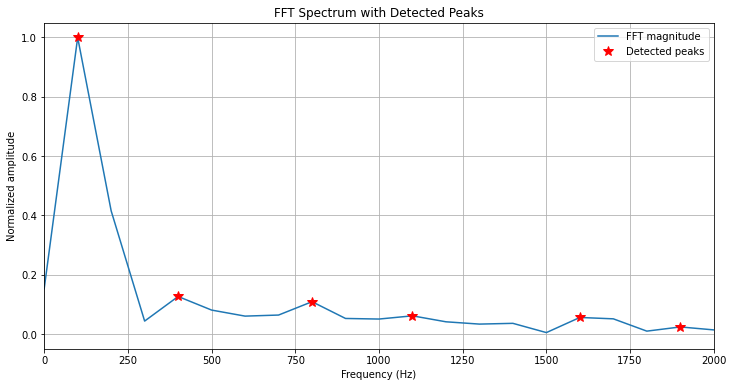

In [18]:
from scipy.signal import find_peaks

from scipy.signal import find_peaks

# Use prominence instead of height
peaks, properties = find_peaks(magnitude, prominence=0.01)

peak_freqs = freqs[peaks]
peak_mags = magnitude[peaks]

for f, m in zip(peak_freqs, peak_mags):
    print(f"{f:.2f} Hz, amplitude: {m:.3f}")

plt.figure(figsize=(12,6))
plt.plot(freqs, magnitude, label='FFT magnitude')
plt.plot(peak_freqs, peak_mags, 'r*', markersize=10, label='Detected peaks')
plt.xlim(0, 2000)   # focus on fundamental + first harmonics
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized amplitude')
plt.title('FFT Spectrum with Detected Peaks')
plt.grid(True)
plt.legend()
plt.show()